# Code to generate Supplemtary Figure 1 in the publication
Distribution of variable sensitivity coefficients and finite difference coefficients for the core *E.coli* Protein Allocation Model (PAM)

In [1]:
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec

import pandas as pd
import numpy as np
import os
import sys

sys.path.append('../Scripts/')
from pam_generation import set_up_ecolicore_pam, parse_enzyme_vsc

from numeric_error_estimation_schemes_vsc import (first_central_numeric_evsc_optimizations,
                                                  fcc_numeric_evsc_optimizations,
                                                  first_central_numeric_vsc_calculation, fcc_numeric_vsc_calculation)
sys.path.append('../Scripts/')
from pam_generation import set_up_ecoli_pam

GLC_UPTAKE = 9.81 #mmol/gcdw/hpamodel_inc.add_enzymes([eGFP_enzyme])
RESULT_DIR =  os.path.join(os.path.split(os.getcwd())[0], 'Results')

Loading PAModelpy modules version 0.0.2.8


## 1. set up *E.coli* core PAM

In [2]:
ecolicore_pam = set_up_ecolicore_pam()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-07
No enzyme information found for reaction: FRD7
Read LP format model from file /tmp/tmp7d5fyf2n.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros
Setting up the proteome allocation model e_coli_core

Add total condition-dependent protein constraint
	Total protein concentration: 0.16995 g/gDW

Add active protein sector

Add the following protein sector: TranslationalProteinSector

Add the following protein sector: UnusedEnzymeSector

Done with setting up the proteome allocation model e_coli_core



/home/samiralvdb/.local/lib/python3.10/site-packages/PAModelpy/EnzymeSectors.py:196: UserWarning: FORt: reaction directionality does not match provided kcat values. Skip reaction
  warn(reaction.id + ': reaction directionality does not match provided kcat values. Skip reaction')


## 2. Calculate sensitivity coefficients

In [3]:
#set glucose uptake rate in the ecoli models to 9.81 for reproducible results
ecolicore_pam.change_reaction_bounds(rxn_id = 'EX_glc__D_e',
                                        lower_bound = -GLC_UPTAKE, upper_bound = -GLC_UPTAKE)

ecolicore_pam.optimize()
#calculate flux control coefficients
fcc_vsc = fcc_numeric_evsc_optimizations(ecolicore_pam)
ecolicore_pam.optimize()
#calculate first order central difference coefficients
fcn_vsc = first_central_numeric_evsc_optimizations(ecolicore_pam)
ecolicore_pam.optimize()
#calculate enzyme variable sensitivity coefficients
Cevsc = parse_enzyme_vsc(ecolicore_pam)

Variable Sensitivity Relationships
----------------------------------
sum(EnzymeVSC)+sum(FluxCSC)+ (1-alpha)ProteomeCSC =  -8.386695019844252
variable sensitivity relation is NOT within bounds. Please check the accuray of the solver and the model structure

-sum(EnzymeVSC) + sum(EnzymeCSC) + alpha*ProteomeCSC =  9.386695019843415
Protein space is NOT fully utilized and variable sensitivity relation is within bounds

Variable Sensitivity Relationships
----------------------------------
sum(EnzymeVSC)+sum(FluxCSC)+ (1-alpha)ProteomeCSC =  -8.386695019844252
variable sensitivity relation is NOT within bounds. Please check the accuray of the solver and the model structure

-sum(EnzymeVSC) + sum(EnzymeCSC) + alpha*ProteomeCSC =  9.386695019843415
Protein space is NOT fully utilized and variable sensitivity relation is within bounds

Variable Sensitivity Relationships
----------------------------------
sum(EnzymeVSC)+sum(FluxCSC)+ (1-alpha)ProteomeCSC =  -8.38632155261857
variable sensitivit

## 3. Plot distribution

In [4]:
def plot_log_hist(axes, data, logbins, fontsize = 16, color = 'blue', annotate = None):
    #add annotation for subfigure (A or B)
    if annotate is not None:
        axes.annotate(annotate, xy=(2, 1), xycoords='data',
            xytext=(-0.05,1.1), textcoords='axes fraction',
            va='top', ha='left', fontsize = fontsize+5, weight = 'bold')
    
    axes.hist(data, bins=logbins, color = color, alpha = 0.5)
    axes.tick_params(axis='x', labelsize=fontsize)
    axes.tick_params(axis='y', labelsize=fontsize)
    axes.set_ylabel('Frequency', fontsize = fontsize)
    axes.set_xscale('log')

/tmp/ipykernel_8700/3414662152.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


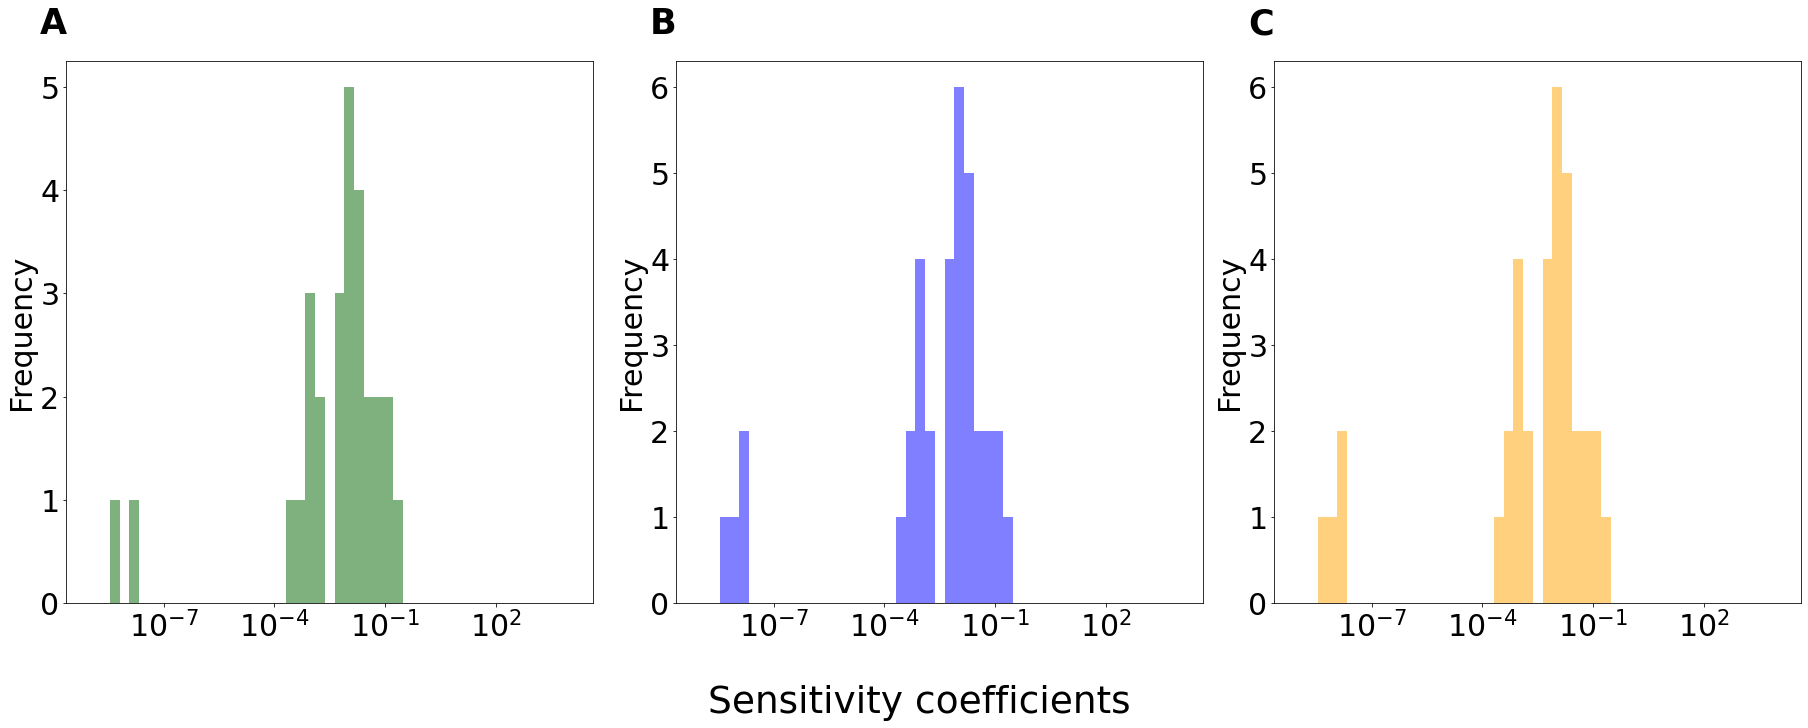

In [5]:
fontsize = 30
width =25
height =10
numbins =50

fig = plt.figure(layout = 'constrained')

#set 3 grids for the three methods, with individual axes
gs0 = gridspec.GridSpec(1, 3, figure=fig)
gs_fcc = gs0[0]
gs_fcn = gs0[1]
gs_vsc = gs0[2]

ax_fcc = fig.add_subplot(gs_fcc)
ax_fcn = fig.add_subplot(gs_fcn)
ax_vsc = fig.add_subplot(gs_vsc)

#plot logarithmic histograms to see the distribution of the calculated coefficients
logbins = np.logspace(np.log10(1e-9),np.log10(1e4), numbins)
plot_log_hist(ax_fcc, fcc_vsc, logbins, fontsize = fontsize, color = 'darkgreen', annotate = 'A')
plot_log_hist(ax_fcn, fcn_vsc, logbins, fontsize = fontsize, annotate = 'B')
plot_log_hist(ax_vsc, Cevsc, logbins, fontsize = fontsize, color = 'orange', annotate = 'C')

#set common xlabel
ax_xlabel = fig.add_subplot(gs0[0, :2])
ax_xlabel.set_xticks([])
ax_xlabel.set_yticks([])
ax_xlabel.set_frame_on(False)
ax_xlabel.set_xlabel('Sensitivity coefficients', fontsize = fontsize*1.25)
ax_xlabel.xaxis.set_label_coords(0.75, -.15)

fig.set_figwidth(width)
fig.set_figheight(height)
fig.savefig('SuppFigure1_VSC-distributions.png')
fig.show()

In [ ]:
fontsize = 16
width =10
height =5
numbins =50

fig,ax = plt.subplots()

#plot logarithmic histograms to see the distribution of the calculated coefficients
logbins = np.logspace(np.log10(1e-9),np.log10(1e4), numbins)
plt.hist(fcc_vsc, bins=logbins, alpha =0.5, histtype='step', fill =False, label = 'flux control coefficient')
plt.hist(fcn_vsc, bins=logbins, alpha =0.5, histtype='step',fill =False,label = 'finite central \ndifference coefficient')
plt.hist(Cvsc, bins=logbins, alpha =0.4, histtype='step',fill =False,label = 'flux allocation coefficient', color ='red')
plt.xscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = fontsize)

plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)

fig.set_figwidth(width)
fig.set_figheight(height)
# fig.savefig('SuppFigure1_VSC-distributions.png')
fig.show()

In [ ]:
sum = 0
for vsc in fcc_vsc:
    if vsc<1:
        sum += vsc
    else:
        print(vsc)

print('sum fcc: ', sum)

In [ ]:
sum = 0
for vsc in fcn_vsc:
    if vsc<1:
        sum += vsc
    else:
        print(vsc)

print('sum fcn: ', sum)